# Week12: Deep Learning and TensorFlow

- **Student ID** : 학번
- **Name** : 이름

- Write and run the code below (including Quiz) in jupyter notebook
- After completion, rename the file, and summit the file to e-class
- Submit file name : **“Week12_\<StudentID\>_\<Name\>.ipynb”**
  - Ex) Week12\_2020123456\_홍길동.ipynb
- Due : **Saturday 11:59pm**

In [112]:
# pip install pydot
# conda install graphviz

# 1. Tensorflow Basic

## Tensor
- Tensor is like a multidimensional array
![image.png](attachment:image.png)

In [113]:
import tensorflow as tf

# rank 0 tensor 2
a = tf.constant(2)
print(a)

# rank 1 tensor [1, 2]
a = tf.constant([1, 2])
print(a)

# rank 2 tensor [[1, 2, 3], [4, 5, 6]]
a = tf.constant([[1, 2, 3], [4, 5, 6]])
print(a)

tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor([1 2], shape=(2,), dtype=int32)
tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)


In [114]:
# tensor a to numpy array
a.numpy()

array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)

In [115]:
# type, rank, shape, size of a
print("Type:", a.dtype)
print("Rank:", a.ndim)
print("Shape:", a.shape)
print("Size:", tf.size(a).numpy())

Type: <dtype: 'int32'>
Rank: 2
Shape: (2, 3)
Size: 6


## Operations

In [116]:
a = tf.constant([[1, 2],
                 [3, 4]])
b = tf.constant([[2, 2],
                 [2, 2]]) 

# element-wise operations on tensors, a + b, a * b
print(a + b, "\n")
print(a * b, "\n")

tf.Tensor(
[[3 4]
 [5 6]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[2 4]
 [6 8]], shape=(2, 2), dtype=int32) 



In [117]:
# matrix multiplication on tensors, a @ b
print(tf.matmul(a, b))
print(a @ b, "\n")

tf.Tensor(
[[ 6  6]
 [14 14]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[ 6  6]
 [14 14]], shape=(2, 2), dtype=int32) 



In [118]:
a = tf.constant([[1, 2, 3],
                 [4, 5, 6]], dtype=tf.float32)

# reduce operations on tensors - sum, max
print(tf.reduce_sum(a))
print(tf.reduce_max(a))

# reduce operations on axis 0 - sum, mean
print(tf.reduce_sum(a, axis = 0))
print(tf.reduce_mean(a, axis = 0))

tf.Tensor(21.0, shape=(), dtype=float32)
tf.Tensor(6.0, shape=(), dtype=float32)
tf.Tensor([5. 7. 9.], shape=(3,), dtype=float32)
tf.Tensor([2.5 3.5 4.5], shape=(3,), dtype=float32)


In [119]:
a = tf.constant([[1, 2, 3],
                 [4, 5, 6]], dtype=tf.float32)
b = tf.constant([[1, 1, 1]], dtype=tf.float32)

# broadcasting a + b
print(a + b)

tf.Tensor(
[[2. 3. 4.]
 [5. 6. 7.]], shape=(2, 3), dtype=float32)


## Variables
- a tensor whose value can be changed by running ops on it. store model parameters such as w and b

In [120]:
# variable x with initial value [[1, 2], [3, 4]]
w = tf.Variable([[1, 2], [3, 4]])

# compute tensor w + 1 
w = w + 1
print(w)

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32)


## Automatic differentiation
- **GradientTape** : For automatic differentiation, TensorFlow needs to remember what operations happen in what order during the forward pass. 
- Then, during the backward pass, TensorFlow traverses this list of operations in reverse order to compute gradients.

![image-3.png](attachment:image-3.png)

In [121]:
# variable with initial value 3.0
x = tf.Variable(3.0)

# record operations on tape
with tf.GradientTape() as tape:
    y = x**2

# compute dy/dx
dy_dx = tape.gradient(y, x)

print(dy_dx.numpy())

6.0


![image.png](attachment:image.png)

In [122]:
# variables with initial value 1s and 0s
w = tf.Variable(tf.ones((3, 2), dtype=tf.float32), name = 'w')
b = tf.Variable(tf.zeros((1, 2), dtype=tf.float32), name = 'b')

x = tf.constant([[1., 2., 3.]])
y = tf.constant([[4., 8.]])

print("w:\n", w.numpy())
print("b:\n", b.numpy())

# record operations on tape
with tf.GradientTape(persistent=True) as tape:
    y_hat = x @ w + b
    loss = tf.reduce_mean((y_hat - y)**2)
    
# compute gradients using tape.gradient()
[dl_dw, dl_db] = tape.gradient(loss, [w, b])

print("y:\n", y.numpy())
print("y_hat:\n", y_hat.numpy())
print("loss:\n", loss.numpy(), "\n")

print("dL/dw:\n", dl_dw.numpy())
print("dL/db:\n", dl_db.numpy())

w:
 [[1. 1.]
 [1. 1.]
 [1. 1.]]
b:
 [[0. 0.]]
y:
 [[4. 8.]]
y_hat:
 [[6. 6.]]
loss:
 4.0 

dL/dw:
 [[ 2. -2.]
 [ 4. -4.]
 [ 6. -6.]]
dL/db:
 [[ 2. -2.]]


### Using optimizer

In [123]:
# variables with initial value 1s and 0s
w = tf.Variable(tf.ones((3, 2), dtype=tf.float32), name='w')
b = tf.Variable(tf.zeros((1, 2), dtype=tf.float32), name='b')

x = tf.constant([[1., 2., 3.]])
y = tf.constant([[4., 8.]])

print("w:\n", w.numpy())
print("b:\n", b.numpy())

# the loss function
def loss():
    y_hat = x @ w + b
    l = tf.reduce_mean((y_hat - y)**2)
    return l

# use an optimizer SGD
opt = tf.keras.optimizers.SGD(learning_rate=0.1)
 
# 1 step of gradient descent. to minimize loss, update w and b by SGD
opt.minimize(loss, [w, b])

print("w:\n", w.numpy())
print("b:\n", b.numpy())

w:
 [[1. 1.]
 [1. 1.]
 [1. 1.]]
b:
 [[0. 0.]]


w:
 [[0.8        1.2       ]
 [0.6        1.4       ]
 [0.39999998 1.6       ]]
b:
 [[-0.2  0.2]]


# 2. Keras : Sequential API

In [124]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

![image.png](attachment:image.png)

### Example of building a sequential model 1

In [125]:
# create sequential model by using add()
# 7 inputs, 1 dense(fully connected) layer with 5 neurons, activation is sigmoid
# 1 dense(fully connected) layer with 4 neurons, activation is sigmoid
model = keras.Sequential()

model.add(keras.Input(shape=(7,)))
model.add(layers.Dense(5, activation = 'sigmoid'))
model.add(layers.Dense(4, activation = 'sigmoid'))

In [126]:
# display the model
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 5)                 40        
                                                                 
 dense_36 (Dense)            (None, 4)                 24        
                                                                 
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


### Example of building a sequential model 2

In [127]:
# create same sequential model, by providing list of layers
model = keras.Sequential(
    [
      keras.Input(shape=(7,)),
      layers.Dense(5, activation = 'sigmoid'),
      layers.Dense(4, activation = 'sigmoid'),
    ]
)

In [128]:
# display the model
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 5)                 40        
                                                                 
 dense_38 (Dense)            (None, 4)                 24        
                                                                 
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


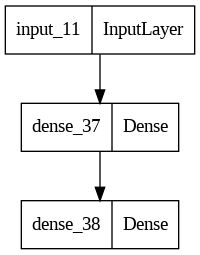

In [129]:
# plot the model structure
tf.keras.utils.plot_model(model)

### Example: XOR style dataset

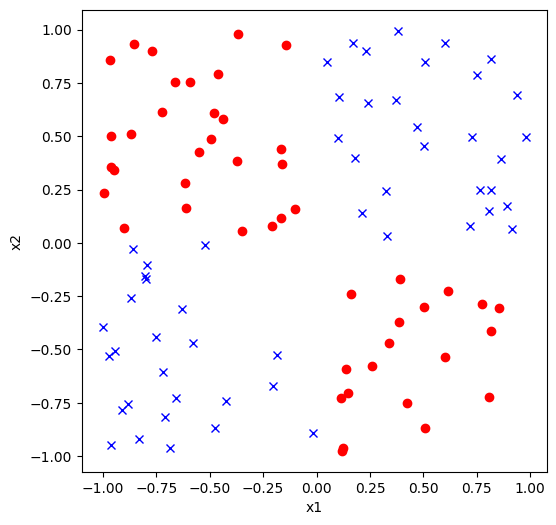

In [130]:
import matplotlib.pyplot as plt
import numpy as np

tf.random.set_seed(1)
np.random.seed(1)

# generate random x in [-1, 1]
x = np.random.uniform(low=-1, high=1, size=(100, 2))

# y is 1 if x is in 1st and 3rd quadrant
y = np.ones(len(x))
y[x[:, 0] * x[:, 1] < 0] = 0

fig = plt.figure(figsize=(6, 6))
plt.plot(x[y==0, 0], x[y==0, 1], 'o', color='red')
plt.plot(x[y==1, 0], x[y==1, 1], 'x', color='blue')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

### Build the model using Keras

![image.png](attachment:image.png)

In [131]:
tf.random.set_seed(1)

# create the model structure. 4 layers with units 4, 4, 4, 1. use activation ReLU and Sigmoid

model = keras.Sequential()
model.add(layers.Dense(units = 4, input_shape=(2,), activation='relu'))
model.add(layers.Dense(units = 4, activation='relu'))
model.add(layers.Dense(units = 4, activation='relu'))
model.add(layers.Dense(units = 1, activation='sigmoid'))

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 4)                 12        
                                                                 
 dense_40 (Dense)            (None, 4)                 20        
                                                                 
 dense_41 (Dense)            (None, 4)                 20        
                                                                 
 dense_42 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


### Compile the model

In [132]:
# compile. use optimizer SGD, loss BinaryCrossentropy
model.compile(optimizer=tf.keras.optimizers.SGD(), loss=tf.keras.losses.BinaryCrossentropy())

### Train the model

In [133]:
# train the model with x, y
hist = model.fit(x, y, epochs=200, batch_size=2, verbose=1)

history = hist.history

Epoch 1/200
50/50 [==============================] - 1s 3ms/step - loss: 0.6988
Epoch 2/200
50/50 [==============================] - 0s 3ms/step - loss: 0.6962
Epoch 3/200
50/50 [==============================] - 0s 3ms/step - loss: 0.6942
Epoch 4/200
50/50 [==============================] - 0s 3ms/step - loss: 0.6925
Epoch 5/200
50/50 [==============================] - 0s 3ms/step - loss: 0.6905
Epoch 6/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6888
Epoch 7/200
50/50 [==============================] - 0s 3ms/step - loss: 0.6865
Epoch 8/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6845
Epoch 9/200
50/50 [==============================] - 0s 3ms/step - loss: 0.6815
Epoch 10/200
50/50 [==============================] - 0s 2ms/step - loss: 0.6800
Epoch 11/200
50/50 [==============================] - 0s 3ms/step - loss: 0.6786
Epoch 12/200
50/50 [==============================] - 0s 3ms/step - loss: 0.6774
Epoch 13/200
50/50 [=================

In [134]:
# show weights of first layer
model.layers[0].get_weights()

[array([[-0.3871845 , -0.19224311,  0.6147617 ,  1.2033709 ],
        [ 0.00865314, -1.3000579 , -1.0143899 , -1.1537546 ]],
       dtype=float32),
 array([-0.08909803,  0.31810367, -0.25147355, -0.29114908], dtype=float32)]

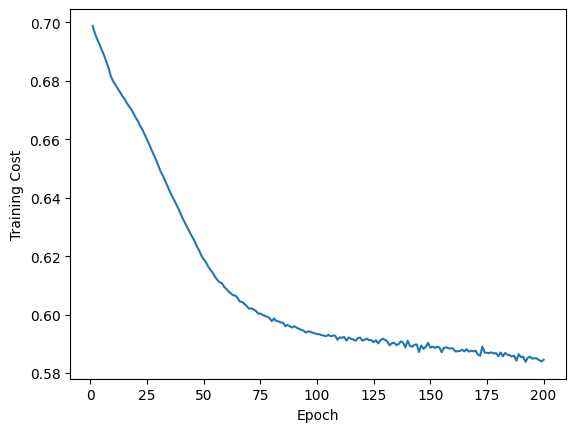

In [136]:
# plot the cost. use history.history['loss']
plt.plot(range(1, len(history['loss']) + 1), history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Training Cost')

plt.show()

### Plot the decision boundary

In [137]:
# A function for plotting decision regions
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 'x', 's', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx], marker=markers[idx], label=cl) 

1238/1238 [==============================] - 2s 1ms/step


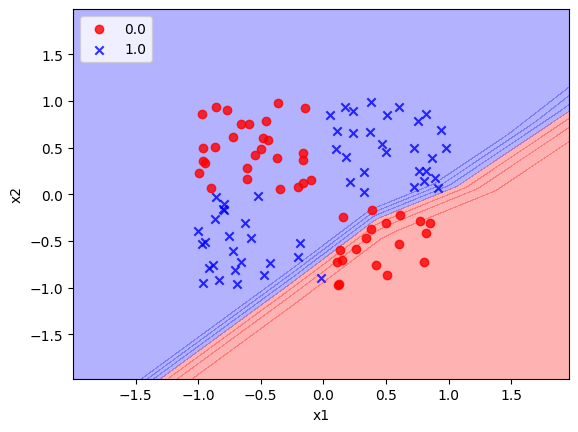

In [138]:
# plot decision boundary of the model 
plot_decision_regions(x, y, model)

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.show()

## Saving and loading the model

In [139]:
# save the model 
model.save("model.h5")

In [140]:
# create a model with same structure
new_model = keras.models.load_model("model.h5")

new_x = [0.8, 0.8]
y_hat = new_model.predict([new_x])
print(y_hat)

1/1 [==============================] - 0s 75ms/step
[[0.63035774]]


---

# 3. Keras : Functional API
- The Keras functional API is a way to create models that are more flexible than the tf.keras.Sequential API
- The functional API can handle models with non-linear topology, shared layers, and even multiple inputs or outputs.

![image.png](attachment:image.png)

### Example of building a model with functional API

In [141]:
from tensorflow import keras
from tensorflow.keras import layers

# inputs with shape (7, ), 
# h1 is outputs(5) of a dense layer with input 'inputs', activation is sigmoid
# outputs is outputs(4) of a dense layer with input 'h1', activation is sigmoid
inputs = keras.Input(shape=(7,))

layer1 = layers.Dense(5, activation = 'sigmoid')
h1 = layer1(inputs)

layer2 = layers.Dense(4, activation = 'sigmoid')
outputs = layer2(h1)

# create a model with inputs=inputs, outputs=outputs
model = keras.Model(inputs=inputs, outputs=outputs)

In [142]:
# display the model
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 7)]               0         
                                                                 
 dense_43 (Dense)            (None, 5)                 40        
                                                                 
 dense_44 (Dense)            (None, 4)                 24        
                                                                 
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


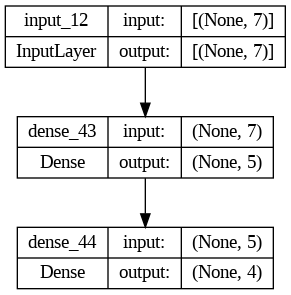

In [143]:
# plot the model structure
tf.keras.utils.plot_model(model, show_shapes=True)

### Example of building more complex model
![image-2.png](attachment:image-2.png)

In [144]:
# input1 (2, ), input2 (5, )
inputs1 = keras.Input(shape=(2,))
inputs2 = keras.Input(shape=(5,))

# h1 is outputs(2) of a dense(fully connected) layer with input 'inputs1'
# h2 is outputs(3) of a dense(fully connected) layer with input 'inputs2'
h1 = layers.Dense(2, activation="sigmoid")(inputs1)
h2 = layers.Dense(3, activation="sigmoid")(inputs2)

# c is a concatenation of h1, h2
c = layers.concatenate([h1, h2])

# outputs1 is outputs(1) of a dense(fully connected) layer with input 'c'
# outputs2 is outputs(10) of a dense(fully connected) layer with input 'c'
outputs1 = layers.Dense(1, activation="sigmoid")(c)
outputs2 = layers.Dense(10, activation="softmax")(c)

# create model with 2 inputs and 2 outputs
model = keras.Model(inputs=[inputs1, inputs2], outputs=[outputs1, outputs2])

In [145]:
# display the model
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 2)]          0           []                               
                                                                                                  
 input_14 (InputLayer)          [(None, 5)]          0           []                               
                                                                                                  
 dense_45 (Dense)               (None, 2)            6           ['input_13[0][0]']               
                                                                                                  
 dense_46 (Dense)               (None, 3)            18          ['input_14[0][0]']               
                                                                                            

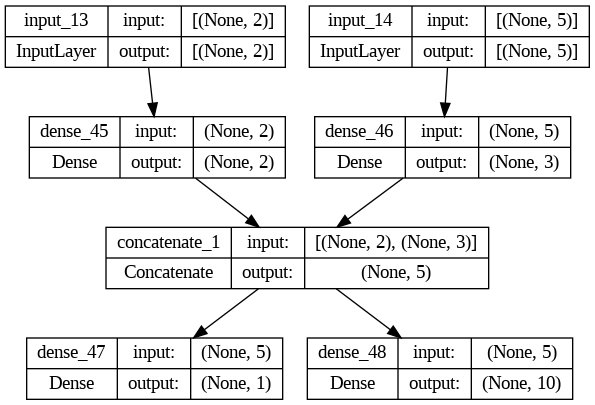

In [146]:
# plot the model structure
tf.keras.utils.plot_model(model, show_shapes=True)

---

# 4. Image Classification using Deep NN with Keras (Sequential API)

### Import TensorFlow

In [147]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Load and prepare the Fashion MNIST dataset

In [148]:
# read fashion MNIST data 
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train.shape

(60000, 28, 28)

In [149]:
# class labels (y_train)
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

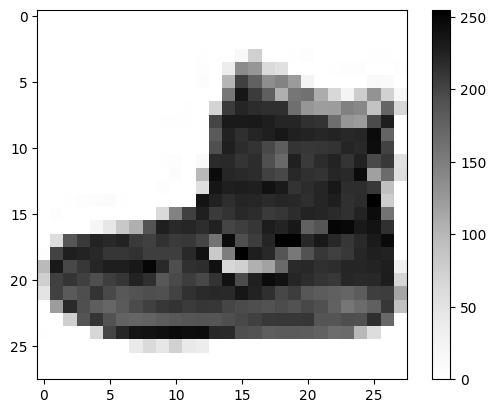

In [150]:
plt.imshow(X_train[0], cmap='Greys')
plt.colorbar()
plt.show()

In [151]:
# names for class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# name of the class label of train data 0
class_names[y_train[0]]

'Ankle boot'

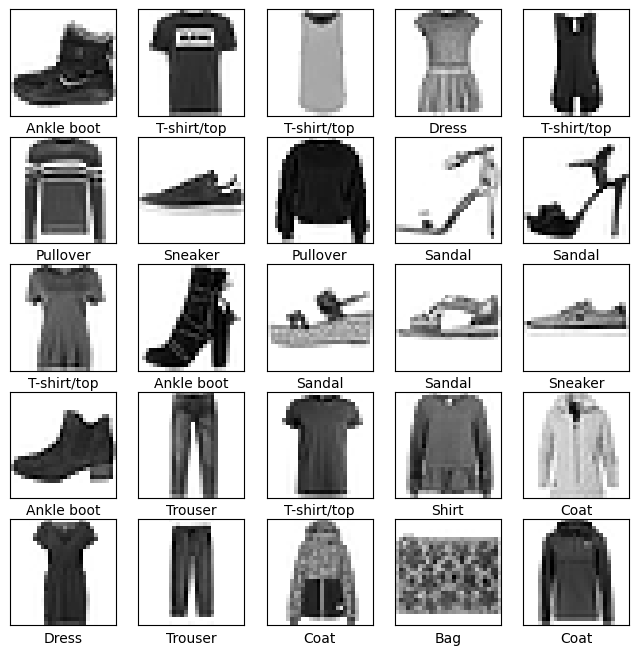

In [152]:
# show first 25 data and label
plt.figure(figsize=(8,8))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [153]:
# scaling X
X_train, X_test = X_train / 255.0, X_test / 255.0

### Build the Deep Neural Network model using Keras

In [154]:
# build the DNN model with flatten input, 2 dense layers with 128 outputs with relu activation,
# 1 dense layers with 10 outputs with softmax activation
model = keras.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# display the model
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_49 (Dense)            (None, 128)               100480    
                                                                 
 dense_50 (Dense)            (None, 128)               16512     
                                                                 
 dense_51 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


### Compile and Train the model
Choose an optimizer and loss function for training

In [155]:
# compile the model with adam optimizer and sparse_categorical_crossentropy loss. metric is accuracy
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [156]:
import time
# checking the execution time
start_time = time.time()

# train the model. use fit(), 20 epoch, batch size 200. record history
history = model.fit(X_train, y_train, epochs=20, batch_size=200)

print("Time : ", time.time()-start_time)

Epoch 1/20
300/300 [==============================] - 2s 3ms/step - loss: 0.5586 - accuracy: 0.8048
Epoch 2/20
300/300 [==============================] - 1s 3ms/step - loss: 0.3942 - accuracy: 0.8611
Epoch 3/20
300/300 [==============================] - 1s 3ms/step - loss: 0.3506 - accuracy: 0.8731
Epoch 4/20
300/300 [==============================] - 1s 3ms/step - loss: 0.3258 - accuracy: 0.8818
Epoch 5/20
300/300 [==============================] - 1s 4ms/step - loss: 0.3053 - accuracy: 0.8882
Epoch 6/20
300/300 [==============================] - 1s 4ms/step - loss: 0.2913 - accuracy: 0.8938
Epoch 7/20
300/300 [==============================] - 1s 3ms/step - loss: 0.2806 - accuracy: 0.8972
Epoch 8/20
300/300 [==============================] - 1s 3ms/step - loss: 0.2700 - accuracy: 0.9012
Epoch 9/20
300/300 [==============================] - 1s 3ms/step - loss: 0.2586 - accuracy: 0.9040
Epoch 10/20
300/300 [==============================] - 1s 3ms/step - loss: 0.2526 - accuracy: 0.9072

### **[Note] Advantage of using GPU**
- TensorFlow can process large batch sizes quickly through parallel computation using GPUs, so it is much faster than Scikit-learn 

### Plot the loss

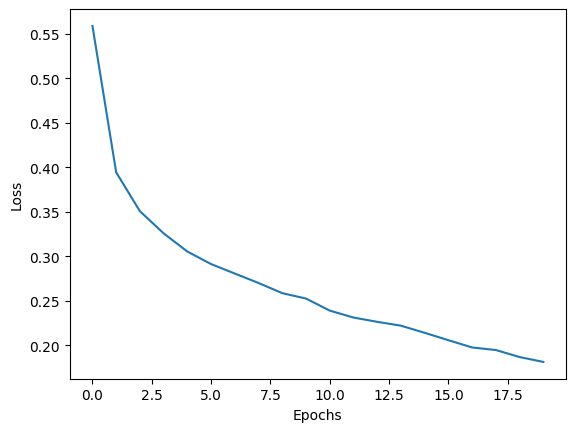

In [157]:
# plot the loss. use history.history['loss']

plt.plot(history.epoch, history.history['loss'])

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### Evaluate the model

In [158]:
# Train and test accuracy. use evaluate()
loss, acc = model.evaluate(X_train, y_train)
print('Train accuracy : %.4f' % acc)
loss, acc = model.evaluate(X_test, y_test)
print('Test accuracy : %.4f' % acc)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.1719 - accuracy: 0.9369
Train accuracy : 0.9369
313/313 [==============================] - 1s 2ms/step - loss: 0.3402 - accuracy: 0.8885
Test accuracy : 0.8885


### Make prediction

In [159]:
# get the predictions of test dataset. use predict()
predictions = model.predict(X_test)
predictions.shape

313/313 [==============================] - 0s 1ms/step


(10000, 10)

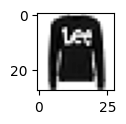

In [160]:
# show the image of test data 1
plt.figure(figsize=(1, 1))
plt.imshow(X_test[1], cmap=plt.cm.binary)
plt.show()

In [161]:
# show the true class name and the predicted class name of test data 1
y_predict = np.argmax(predictions[1])
print('True lable = %s' % class_names[y_test[1]])
print('Predicted = %s' % class_names[y_predict])

True lable = Pullover
Predicted = Pullover


---

# Quiz 1 : Learning Nonlinear Decision Boundary
## Train DNN model with the moon dataset
- Build the Deep NN model with 100 neurons in 1 hidden layer, 1 neuron in output layer using Keras sequential API
- Use ReLU for hiden layer and sigmoid for output layer
- Use Adam optimizer and binary cross entropy

1. Train the model up to 100 epochs with btach size 10
2. Plot the cost change during training
3. Show the decision boundary 

### Dataset

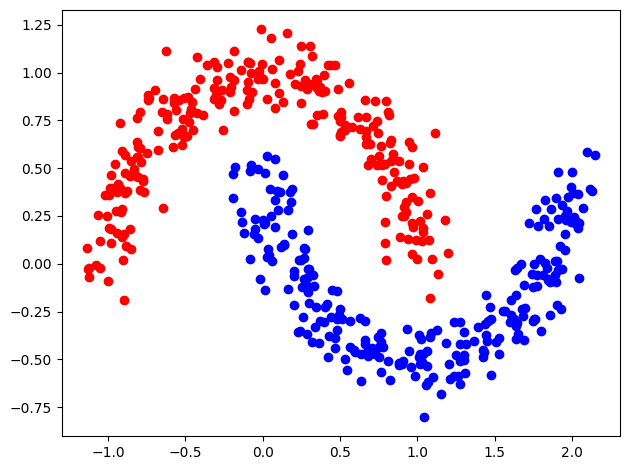

In [163]:
from sklearn.datasets import make_moons, make_circles
import matplotlib.pyplot as plt

# generate 500 moon data
X, y = make_moons(n_samples=500, noise=0.1, random_state=0)

plt.scatter(X[y==0, 0], X[y==0, 1], c='r')
plt.scatter(X[y==1, 0], X[y==1, 1], c='b')
plt.tight_layout()

plt.show()

In [181]:
import tensorflow as tf
import numpy as np

tf.random.set_seed(1)

# create the model structure. 1 hidden layer with 100 units, output layer with 1 unit.
# use activation ReLU and Sigmoid. show model summary
model = keras.Sequential()
model.add(layers.Dense(units = 100, input_shape=(2,), activation = 'relu'))
model.add(layers.Dense(units = 1, activation = 'sigmoid'))

model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 100)               300       
                                                                 
 dense_70 (Dense)            (None, 1)                 101       
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


### Compile the model

In [182]:
# compile. use optimizer Adam, loss BinaryCrossentropy
model.compile(optimizer='adam', loss='binary_crossentropy')

### Train the model

In [183]:
# train the model with X, y. Up to 100 epochs, batch size 10
hist = model.fit(X, y, epochs = 100, batch_size = 10)

history = hist.history

Epoch 1/100
50/50 [==============================] - 2s 4ms/step - loss: 0.5534
Epoch 2/100
50/50 [==============================] - 0s 3ms/step - loss: 0.4266
Epoch 3/100
50/50 [==============================] - 0s 3ms/step - loss: 0.3521
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 0.3129
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2885
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2721
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2609
Epoch 8/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2521
Epoch 9/100
50/50 [==============================] - 0s 3ms/step - loss: 0.2451
Epoch 10/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2399
Epoch 11/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2360
Epoch 12/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2317
Epoch 13/100
50/50 [=================

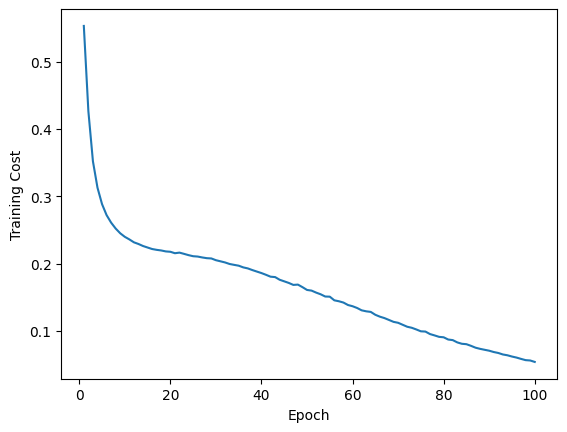

In [184]:
# plot the cost. use history.history['loss']
plt.plot(range(1, len(history['loss']) + 1), history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Training Cost')

plt.show()

### Plot the decision boundary

In [185]:
# A function for plotting decision regions
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 'x', 's', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx], marker=markers[idx], label=cl) 

1673/1673 [==============================] - 4s 2ms/step


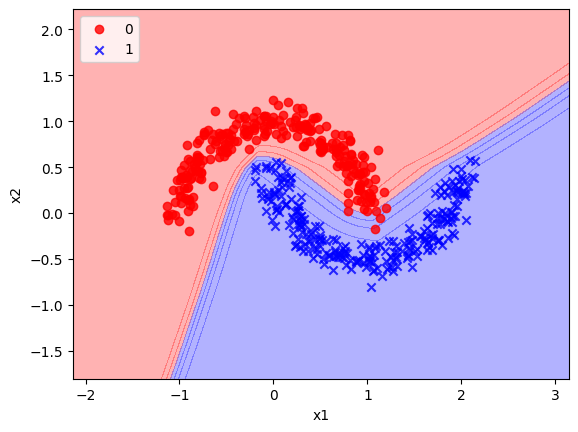

In [186]:
# plot decision boundary of the model 
plot_decision_regions(X, y, model)

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.show()

---

# Quiz 2 : CIFAR-10 Image Classification using DNN 
- Dataset : CIFAR-10
   - 32 x 32 x 3 color images (R, G, B)
   - 10 classes


1. Load the dataset
2. Build the DNN model for image classification using Keras
   - Use 2 hidden layers of 128 neurons each with ReLU activation
3. Train the model with Adam optimizer
4. Evaluate the model
5. Classify test images [1] ~ [10], and show the results

In [187]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Load and prepare the CIFAR-10 dataset
- 32 x 32 x 3 color images 
- 10 classes
- 50000 traning data, 10000 test data

In [188]:
# load CIFAR-10 dataset 
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

170498071/170498071 [==============================] - 2s 0us/step


In [190]:
# check the shape of train and test dataset
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [193]:
# check the labels of train data 0 ~ 4
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

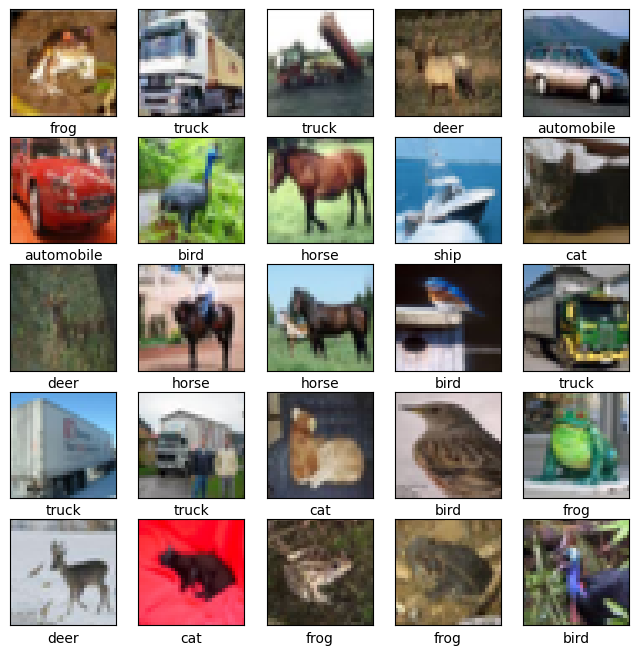

In [194]:
# class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# show first 25 train images and labels
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

### Build DNN model with Keras - Sequential API

In [203]:
# build the model 
# input shape is (32, 32, 3)
# 1 flatten layer, 2 dense layers with 128 outputs with relu, 1 dense layers with 10 outputs with softmax
model = keras.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# compile the model with adam optimizer and sparse categorical crossentropy loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# display the model
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_74 (Dense)            (None, 128)               393344    
                                                                 
 dense_75 (Dense)            (None, 128)               16512     
                                                                 
 dense_76 (Dense)            (None, 10)                1290      
                                                                 
Total params: 411,146
Trainable params: 411,146
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [204]:
# train the model. upto 100 epochs, batch size 256. record history
history = model.fit(X_train, y_train, epochs=100, batch_size=256)

Epoch 1/100
196/196 [==============================] - 2s 4ms/step - loss: 1.9167 - accuracy: 0.3110
Epoch 2/100
196/196 [==============================] - 1s 4ms/step - loss: 1.7233 - accuracy: 0.3872
Epoch 3/100
196/196 [==============================] - 1s 4ms/step - loss: 1.6515 - accuracy: 0.4133
Epoch 4/100
196/196 [==============================] - 1s 4ms/step - loss: 1.5876 - accuracy: 0.4380
Epoch 5/100
196/196 [==============================] - 1s 4ms/step - loss: 1.5623 - accuracy: 0.4456
Epoch 6/100
196/196 [==============================] - 1s 4ms/step - loss: 1.5199 - accuracy: 0.4604
Epoch 7/100
196/196 [==============================] - 1s 4ms/step - loss: 1.4970 - accuracy: 0.4667
Epoch 8/100
196/196 [==============================] - 1s 4ms/step - loss: 1.4751 - accuracy: 0.4766
Epoch 9/100
196/196 [==============================] - 1s 4ms/step - loss: 1.4537 - accuracy: 0.4834
Epoch 10/100
196/196 [==============================] - 1s 4ms/step - loss: 1.4326 - accura

### Evaluate the model

In [207]:
# evaluate the model with training data
model.evaluate(X_train, y_train)

1563/1563 [==============================] - 4s 2ms/step - loss: 0.9546 - accuracy: 0.6629


[0.9545870423316956, 0.6629400253295898]

In [208]:
# evaluate the model with test data
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.5249 - accuracy: 0.5106


[1.5248796939849854, 0.5105999708175659]

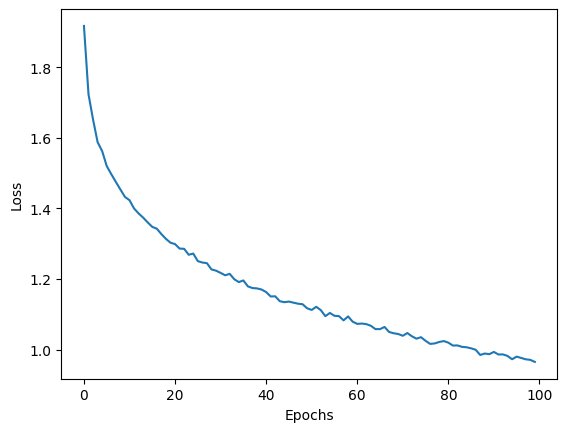

In [209]:
# plot the loss
plt.plot(history.epoch, history.history['loss'])

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### Classify test images

In [213]:
# get predictions of test data 0. need reshape to (1, 32, 32, 3)
predictions = model.predict(X_test[0].reshape(1, 32, 32, 3))
predictions

1/1 [==============================] - 0s 85ms/step


array([[0.06905426, 0.00477204, 0.07182257, 0.57005924, 0.00916321,
        0.26513034, 0.00197261, 0.00190028, 0.00270729, 0.00341818]],
      dtype=float32)

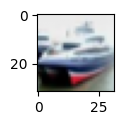

1/1 [==============================] - 0s 29ms/step
True lable = ship
Predicted = ship


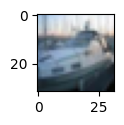

1/1 [==============================] - 0s 27ms/step
True lable = ship
Predicted = airplane


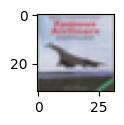

1/1 [==============================] - 0s 37ms/step
True lable = airplane
Predicted = airplane


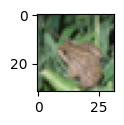

1/1 [==============================] - 0s 31ms/step
True lable = frog
Predicted = deer


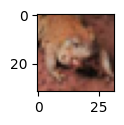

1/1 [==============================] - 0s 26ms/step
True lable = frog
Predicted = frog


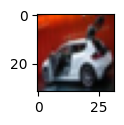

1/1 [==============================] - 0s 29ms/step
True lable = automobile
Predicted = cat


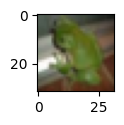

1/1 [==============================] - 0s 19ms/step
True lable = frog
Predicted = frog


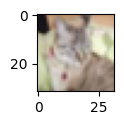

1/1 [==============================] - 0s 19ms/step
True lable = cat
Predicted = bird


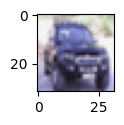

1/1 [==============================] - 0s 18ms/step
True lable = automobile
Predicted = automobile


In [221]:
import numpy as np

# show the classification result of test images 1 ~ 9
for i in range(1, 10):
    plt.figure(figsize=(1,1))
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.show()
    
    prediction = model.predict(X_test[i].reshape(1, 32, 32, 3))
    y_predict = np.argmax(prediction)
    print('True lable = %s' % class_names[y_test[i][0]])
    print('Predicted = %s' % class_names[y_predict])
